### Tâche de discrimination avec 1 MotionCloud

In [1]:
%ls C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta

 Le volume dans le lecteur C n'a pas de nom.
 Le num‚ro de s‚rie du volume est 5C12-EBC7

 R‚pertoire de C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta

28/01/2020  17:14    <DIR>          .
28/01/2020  17:14    <DIR>          ..
28/01/2020  16:27             9ÿ045 Psychophys_discrim_JF1.p
28/01/2020  17:07             9ÿ051 Psychophys_discrim_JF2.p
28/01/2020  17:13             9ÿ041 Psychophys_discrim_JF3.p
               3 fichier(s)           27ÿ137 octets
               2 R‚p(s)  131ÿ862ÿ245ÿ376 octets libres


In [60]:
#Charge le contenu du fichier où se trouve nos données "expérimentales"

import pickle
import matplotlib.pyplot as plt

subj_name_list = ['JF1','JF2','JF3']
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open(r'C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta\Psychophys_discrim_%s.p'%subject, 'rb'))
    subj_data_list.append(x)

* #### Représentation graphique 

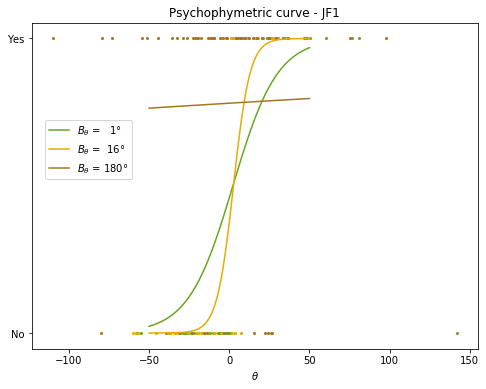

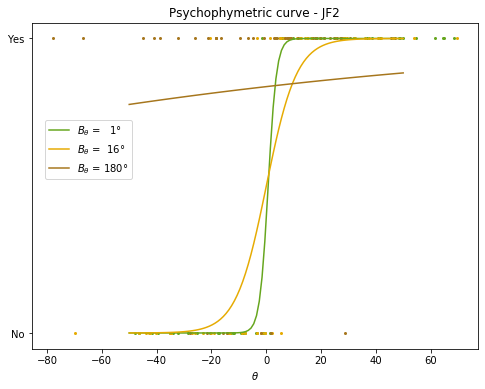

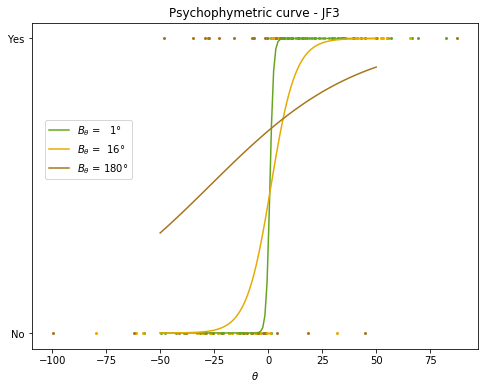

In [97]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if  i[2] == 'right':  
                        y.append(1)
                else :
                        y.append(0)
      
        X = np.asarray(X)
        X = X[:,np.newaxis]
        #X = np.tanh(X)
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
            
    plt.title('Psychophymetric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

* #### TanH (X)

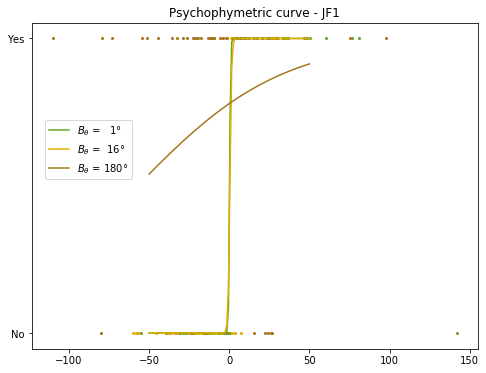

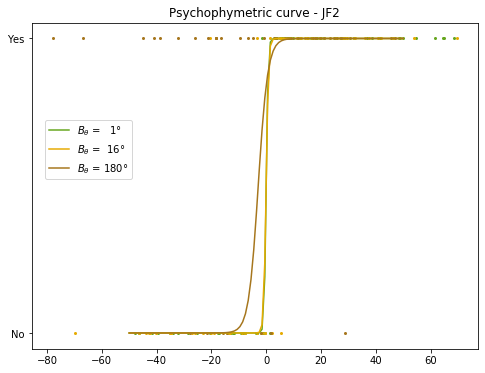

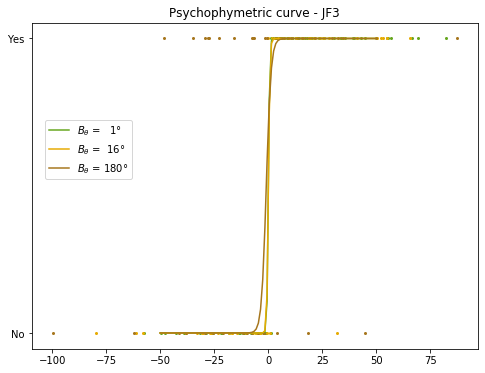

In [96]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})


b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi)
b_thetas_list = sorted(set(b_thetas_list))

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if  i[2] == 'right':  
                        y.append(1)
                else :
                        y.append(0)
      
        X = np.asarray(X)
        X = X[:,np.newaxis]
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(np.tanh(X), y) #doute?
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
            
    plt.title('Psychophymetric curve - %s' % subj_name_list[num])
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show